In [1]:
from __future__ import division
# from models import *
from extended_models import *
from networks import *
from sim_loops import *
import networkx
import pickle
import gzip
import pandas
from scipy.stats import linregress

In [2]:
import matplotlib.pyplot as pyplot
# pyplot.switch_backend('agg')
import seaborn
seaborn.set_style('ticks')

In [3]:
import argparse

parser  = argparse.ArgumentParser()
# parser.add_argument("-runID",                         "--runID",                          default="notebook",     type=str)
# parser.add_argument("-T",                             "--T",                              default=300,          type=float)
# parser.add_argument("-N",                             "--N",                              default=10000,        type=int)
# parser.add_argument("-INIT_PCT_E",                    "--INIT_PCT_E",                     default=(1/10000),    type=float)
# parser.add_argument("-INTERVENTION_START_PCT_INFECTED", "--INTERVENTION_START_PCT_INFECTED", default=(1/100),   type=float)
# parser.add_argument("-R0_mean",                       "--R0_mean",                        default=2.5,          type=float)
# parser.add_argument("-R0_coeffvar",                   "--R0_coeffvar",                    default=0.2,          type=float)
# parser.add_argument("-PCT_ASYMPTOMATIC",              "--PCT_ASYMPTOMATIC",               default=0.25,          type=float)
# parser.add_argument("-P_GLOBALINTXN",                 "--P_GLOBALINTXN",                  default=0.25,         type=float)
# parser.add_argument("-Q_GLOBALINTXN",                 "--Q_GLOBALINTXN",                  default=0.1,          type=float)
# parser.add_argument("-TESTING_INTERVAL",              "--TESTING_INTERVAL",               default=1,            type=float)
# parser.add_argument("-FRAC_TO_TEST_PER_INTERVAL",     "--FRAC_TO_TEST_PER_INTERVAL",      default=(1/2**7),       type=float)
# parser.add_argument("-TEST_FALSENEG_RATE",            "--TEST_FALSENEG_RATE",             default='temporal',   type=str)
# parser.add_argument("-TESTING_RANDOM_COMPLIANCE_RATE",          "--TESTING_RANDOM_COMPLIANCE_RATE",          default=0.8, type=float)
# parser.add_argument("-TESTING_TRACED_COMPLIANCE_RATE",          "--TESTING_TRACED_COMPLIANCE_RATE",          default=0.8, type=float)
# parser.add_argument("-TESTING_SELFSEEK_COMPLIANCE_RATE",        "--TESTING_SELFSEEK_COMPLIANCE_RATE",        default=1.0, type=float)
# parser.add_argument("-TESTING_DEGREE_BIAS",           "--TESTING_DEGREE_BIAS",            default=0,            type=float)
# parser.add_argument("-MAX_PCT_TESTS_FOR_TRACING",     "--MAX_PCT_TESTS_FOR_TRACING",      default=1.0,          type=float)
# parser.add_argument("-TRACING_COMPLIANCE_RATE",       "--TRACING_COMPLIANCE_RATE",        default=0.8,          type=float)
# parser.add_argument("-NUM_CONTACTS_TO_TRACE",         "--NUM_CONTACTS_TO_TRACE",          default=None,         type=float)
# parser.add_argument("-FRAC_CONTACTS_TO_TRACE",        "--FRAC_CONTACTS_TO_TRACE",         default=1.0,          type=float)
# parser.add_argument("-TRACING_INTERVAL_LAG",          "--TRACING_INTERVAL_LAG",           default=2,            type=int)
# parser.add_argument("-MAX_PCT_TESTS_FOR_SEEKING",     "--MAX_PCT_TESTS_FOR_SEEKING",      default=1.0,          type=float)
# parser.add_argument("-SYMPTOMATIC_SEEKTEST_COMPLIANCE_RATE",    "--SYMPTOMATIC_SEEKTEST_COMPLIANCE_RATE",     default=0.8, type=float)
# parser.add_argument("-SYMPTOMATIC_SELFISOLATE_COMPLIANCE_RATE", "--SYMPTOMATIC_SELFISOLATE_COMPLIANCE_RATE",  default=0.8, type=float)
# parser.add_argument("-TRACING_SELFISOLATE_COMPLIANCE_RATE",     "--TRACING_SELFISOLATE_COMPLIANCE_RATE",      default=0.8, type=float)
# parser.add_argument("-HOUSEHOLD_ISOLATION_COMPLIANCE_RATE",     "--HOUSEHOLD_ISOLATION_COMPLIANCE_RATE",      default=0.8, type=float)
# parser.add_argument("-DO_RANDOM_TESTING",             "--DO_RANDOM_TESTING",              default=True,         type=int)
# parser.add_argument("-DO_TRACING_TESTING",            "--DO_TRACING_TESTING",             default=True,         type=int)
# parser.add_argument("-DO_SEEKING_TESTING",            "--DO_SEEKING_TESTING",             default=True,         type=int)
# parser.add_argument("-DO_SYMPTOM_SELFISO",            "--DO_SYMPTOM_SELFISO",             default=True,         type=int)
# parser.add_argument("-DO_TRACING_SELFISO",            "--DO_TRACING_SELFISO",             default=False,        type=int)
# parser.add_argument("-DO_ISOLATE_POSITIVE_HOUSEHOLDS",          "--DO_ISOLATE_POSITIVE_HOUSEHOLDS",           default=False, type=int)
# parser.add_argument("-DO_ISOLATE_SYMPTOMATIC_HOUSEHOLDS",       "--DO_ISOLATE_SYMPTOMATIC_HOUSEHOLDS",        default=False, type=int)
# parser.add_argument("-DO_ISOLATE_TRACING_SELFISO_HOUSEHOLDS",   "--DO_ISOLATE_TRACING_SELFISO_HOUSEHOLDS",    default=False, type=int)
# parser.add_argument("-BETA_PAIRWISE_MODE",            "--BETA_PAIRWISE_MODE",             default='mean',       type=str)
# parser.add_argument("-ALPHA_PAIRWISE_MODE",           "--ALPHA_PAIRWISE_MODE",            default='mean',       type=str)
# parser.add_argument("-TRANSITION_MODE",               "--TRANSITION_MODE",                default='exponential_rates',       type=str)

# Jupyter argparse conflict issues:
# parser.add_argument("-shit",                        "--shit",                         default="./results/", type=str)
# parser.add_argument("-outdir",                        "--outdir",                         default="./figs/", type=str)
args, unknown = parser.parse_known_args()

In [4]:
runID           = str(args.runID)

outdir          = "/Users/ryan/Dropbox/Projects/ResearchProjects/covid/analysis/whitepaper/1pass/results/" #str(args.outdir)
figdir          = "/Users/ryan/Dropbox/Projects/ResearchProjects/covid/analysis/whitepaper/1pass/figs/" #str(args.shit)

# ### Parameters that can be swept:

T = args.T

N = int(args.N)

INIT_PCT_E   = args.INIT_PCT_E
INIT_EXPOSED = max(int(N*INIT_PCT_E), 10)

INTERVENTION_START_PCT_INFECTED = args.INTERVENTION_START_PCT_INFECTED

R0_mean      = args.R0_mean
R0_coeffvar  = args.R0_coeffvar

PCT_ASYMPTOMATIC = args.PCT_ASYMPTOMATIC

P_GLOBALINTXN = args.P_GLOBALINTXN
Q_GLOBALINTXN = args.Q_GLOBALINTXN

TESTING_INTERVAL          = args.TESTING_INTERVAL
FRAC_TO_TEST_PER_INTERVAL = args.FRAC_TO_TEST_PER_INTERVAL
TESTS_PER_INTERVAL        = int(N*FRAC_TO_TEST_PER_INTERVAL)
TESTING_DEGREE_BIAS       = args.TESTING_DEGREE_BIAS

TEST_FALSENEG_RATE        = args.TEST_FALSENEG_RATE if args.TEST_FALSENEG_RATE == "temporal" else float(args.TEST_FALSENEG_RATE)

TESTING_RANDOM_COMPLIANCE_RATE   = args.TESTING_RANDOM_COMPLIANCE_RATE
TESTING_TRACED_COMPLIANCE_RATE   = args.TESTING_TRACED_COMPLIANCE_RATE
TESTING_SELFSEEK_COMPLIANCE_RATE = args.TESTING_SELFSEEK_COMPLIANCE_RATE

MAX_PCT_TESTS_FOR_TRACING = args.MAX_PCT_TESTS_FOR_TRACING
TRACING_COMPLIANCE_RATE   = args.TRACING_COMPLIANCE_RATE
NUM_CONTACTS_TO_TRACE     = args.NUM_CONTACTS_TO_TRACE # If None, trace based on fraction of contacts given below
FRAC_CONTACTS_TO_TRACE    = args.FRAC_CONTACTS_TO_TRACE
TRACING_INTERVAL_LAG      = args.TRACING_INTERVAL_LAG

MAX_PCT_TESTS_FOR_SEEKING = args.MAX_PCT_TESTS_FOR_SEEKING

SYMPTOMATIC_SEEKTEST_COMPLIANCE_RATE    = args.SYMPTOMATIC_SEEKTEST_COMPLIANCE_RATE
SYMPTOMATIC_SELFISOLATE_COMPLIANCE_RATE = args.SYMPTOMATIC_SELFISOLATE_COMPLIANCE_RATE
TRACING_SELFISOLATE_COMPLIANCE_RATE     = args.TRACING_SELFISOLATE_COMPLIANCE_RATE
HOUSEHOLD_ISOLATION_COMPLIANCE_RATE     = args.HOUSEHOLD_ISOLATION_COMPLIANCE_RATE

DO_RANDOM_TESTING   = args.DO_RANDOM_TESTING
DO_TRACING_TESTING  = args.DO_TRACING_TESTING
DO_SEEKING_TESTING  = args.DO_SEEKING_TESTING
DO_SYMPTOM_SELFISO  = args.DO_SYMPTOM_SELFISO
DO_TRACING_SELFISO  = args.DO_TRACING_SELFISO

DO_ISOLATE_POSITIVE_HOUSEHOLDS        = args.DO_ISOLATE_POSITIVE_HOUSEHOLDS 
DO_ISOLATE_SYMPTOMATIC_HOUSEHOLDS     = args.DO_ISOLATE_SYMPTOMATIC_HOUSEHOLDS 
DO_ISOLATE_TRACING_SELFISO_HOUSEHOLDS = args.DO_ISOLATE_TRACING_SELFISO_HOUSEHOLDS

BETA_PAIRWISE_MODE  = args.BETA_PAIRWISE_MODE
ALPHA_PAIRWISE_MODE = args.ALPHA_PAIRWISE_MODE
TRANSITION_MODE     = args.TRANSITION_MODE

runStr = ("_whitepaper"
            +"_N"+str(N)
            +"_R0"+str(R0_mean)[0]+"pt"+str(R0_mean)[2:4]+"cv"+str(R0_coeffvar)[0]+"pt"+str(R0_coeffvar)[2:4]
            +"_p"+str(P_GLOBALINTXN)[0]+"pt"+str(P_GLOBALINTXN)[2:4]
            +"_fracTest"+str(FRAC_TO_TEST_PER_INTERVAL)[0]+"pt"+str(FRAC_TO_TEST_PER_INTERVAL)[2:6]
            +"_fracTrace"+str(FRAC_CONTACTS_TO_TRACE)[0]+"pt"+str(FRAC_CONTACTS_TO_TRACE)[2:4]
            +("_isoPosHH" if DO_ISOLATE_POSITIVE_HOUSEHOLDS else "")
            +("_isoTraceHH" if DO_ISOLATE_TRACING_SELFISO_HOUSEHOLDS else "")
            +"_trans"+("Rates" if TRANSITION_MODE=='exponential_rates' else "Timer" if TRANSITION_MODE=='time_in_state' else "")
            +"_"+runID
         )
print runStr

_whitepaper_N10000_R02pt5cv0pt2_p0pt25_fracTest0pt0078_fracTrace1pt0_transRates_notebook


mean household size: 2.448393594
Num households: 4153
Generated overall age distribution:
0-9: 0.1072	(-0.0138 from target)
10-19: 0.1160	(-0.0150 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1402	(0.0072 from target)
40-49: 0.1248	(0.0008 from target)
50-59: 0.1337	(0.0027 from target)
60-69: 0.1234	(0.0084 from target)
70-79: 0.0736	(0.0036 from target)
80+: 0.0401	(0.0021 from target)
Generated household size distribution:
1: 0.2995	(0.0158 from target)
2: 0.3417	(-0.0034 from target)
3: 0.1464	(-0.0043 from target)
4: 0.1233	(-0.0044 from target)
5: 0.0551	(-0.0026 from target)
6: 0.0207	(-0.0019 from target)
7: 0.0132	(0.0008 from target)
Generated percent households with at least one member Under 20:
0.3258		(-0.0110 from target)
Generated percent households with at least one Over 60
0.3857		(0.0056 from target)
Generated percent households with at least one Under 20 AND Over 60
0.0344		(0.0003 from target)
Generated percent households with 1 total member who is Over 

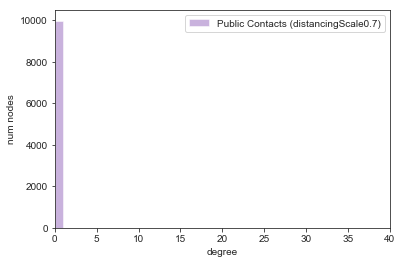

distancingScale0.7: Overall mean degree = 2.253
distancingScale0.7: Overall max degree = 8
distancingScale0.7: number of connected components = 3938
distancingScale0.7: largest connected component = 22
	distancingScale0.7: 10-19 final graph mean degree = 2.1458153580672996
	distancingScale0.7: 10-19 final graph max degree  = 7
	distancingScale0.7: 20-59 final graph mean degree = 2.313009636767976
	distancingScale0.7: 20-59 final graph max degree  = 8
	distancingScale0.7: 0-9 final graph mean degree = 2.223155929038282
	distancingScale0.7: 0-9 final graph max degree  = 6
	distancingScale0.7: 60+ final graph mean degree = 2.178481012658228
	distancingScale0.7: 60+ final graph max degree  = 7


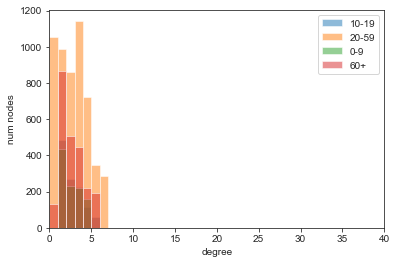

baseline: Overall mean degree = 13.7622
baseline: Overall max degree = 148
baseline: number of connected components = 19
baseline: largest connected component = 9980
	baseline: 10-19 final graph mean degree = 15.912855910267472
	baseline: 10-19 final graph max degree  = 148
	baseline: 20-59 final graph mean degree = 14.102112676056338
	baseline: 20-59 final graph max degree  = 99
	baseline: 0-9 final graph mean degree = 9.137254901960784
	baseline: 0-9 final graph max degree  = 70
	baseline: 60+ final graph mean degree = 14.041350210970464
	baseline: 60+ final graph max degree  = 98


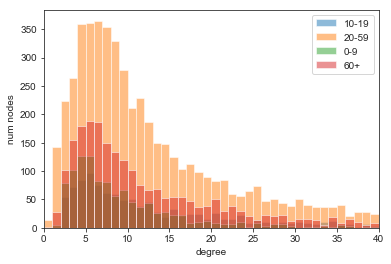

In [5]:
demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, 
                                                            demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7],
                                                            isolation_groups=[],
                                                            layer_generator='FARZ')

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

In [6]:
degree      = [d[1] for d in G_baseline.degree()]
mean_degree = numpy.mean(degree)
median_degree = numpy.median(degree)
max_degree  = numpy.max(degree)
CV_degree   = numpy.std(degree)/mean_degree
print "baseline graph mean degree       = " + str(mean_degree)
print "baseline graph median degree     = " + str(median_degree)
print "baseline graph CV degree         = " + str(CV_degree)
print "baseline graph CV^2 degree       = " + str(CV_degree**2)

r = networkx.degree_assortativity_coefficient(G_baseline)
print "baseline graph assortativity     = " + str(r)

c = networkx.average_clustering(G_baseline)
print "baseline graph clustering coeff  = " + str(c)

baseline graph mean degree       = 13.7622
baseline graph median degree     = 9.0
baseline graph CV degree         = 0.9654965642238701
baseline graph CV^2 degree       = 0.9321836155280977
baseline graph assortativity     = 0.12757021025574375
baseline graph clustering coeff  = 0.259957943991


Latent period: mean       = 3.0150818275563123
Latent period: median     = 2.647214380501654
Latent period: 5  pctile  = 0.7671801149255089
Latent period: 25 pctile  = 1.689952804266085
Latent period: 75 pctile  = 3.987089292239108
Latent period: 95 pctile  = 6.449166144543869
SIGMA mean   = 0.5153807216827901
SIGMA median = 0.37775559817325555
Prodromal period: mean       = 2.208927113264263
Prodromal period: median     = 2.0329289653025593
Prodromal period: 5  pctile  = 0.7703049096185033
Prodromal period: 25 pctile  = 1.4025854345203521
Prodromal period: 75 pctile  = 2.811965306368853
Prodromal period: 95 pctile  = 4.251186957587515
LAMDA mean   = 0.5987765108131956
LAMDA median = 0.4919011028588529
Incubation period: mean       = 5.224008940820575
Incubation period: median     = 4.923625636911137
Incubation period: 5  pctile  = 2.3469604146247196
Incubation period: 25 pctile  = 3.7138397889298336
Incubation period: 75 pctile  = 6.4236643661353785
Incubation period: 95 pctile  = 9.1

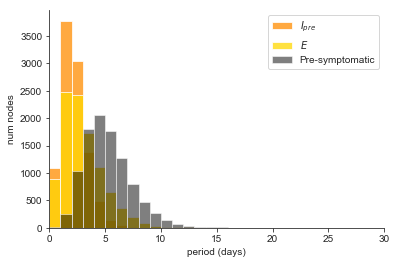

In [7]:
latentPeriods_mean, latentPeriods_coeffvar = 3.0, 0.6
latentPeriods_scale     = latentPeriods_mean*latentPeriods_coeffvar**2    
latentPeriods_shape     = latentPeriods_mean/latentPeriods_scale          
latentPeriods           = numpy.random.gamma(scale=latentPeriods_scale, shape=latentPeriods_shape, size=N)
SIGMA  = 1 / latentPeriods
print("Latent period: mean       = " + str(numpy.mean(numpy.sort(latentPeriods))) )
print("Latent period: median     = "+str(numpy.percentile(numpy.sort(latentPeriods), q=50)) )
print("Latent period: 5  pctile  = "+str(numpy.percentile(numpy.sort(latentPeriods), q=5)) )
print("Latent period: 25 pctile  = "+str(numpy.percentile(numpy.sort(latentPeriods), q=25)) )
print("Latent period: 75 pctile  = "+str(numpy.percentile(numpy.sort(latentPeriods), q=75)) )
print("Latent period: 95 pctile  = "+str(numpy.percentile(numpy.sort(latentPeriods), q=95)) )
print("SIGMA mean   = " +str(numpy.mean(SIGMA)) )
print("SIGMA median = " +str(numpy.median(SIGMA)) )

prodromalPeriod_mean, prodromalPeriod_coeffvar = 2.2, 0.5
prodromalPeriod_scale   = prodromalPeriod_mean*prodromalPeriod_coeffvar**2    # gamma distn theta
prodromalPeriod_shape   = prodromalPeriod_mean/prodromalPeriod_scale          # gamma distn k
prodromalPeriods        = numpy.random.gamma(scale=prodromalPeriod_scale, shape=prodromalPeriod_shape, size=N)
LAMDA = 1 / prodromalPeriods
print("Prodromal period: mean       = "+ str(numpy.mean(numpy.sort(prodromalPeriods))) )
print("Prodromal period: median     = "+str(numpy.percentile(numpy.sort(prodromalPeriods), q=50)) )
print("Prodromal period: 5  pctile  = "+str(numpy.percentile(numpy.sort(prodromalPeriods), q=5)) )
print("Prodromal period: 25 pctile  = "+str(numpy.percentile(numpy.sort(prodromalPeriods), q=25)) )
print("Prodromal period: 75 pctile  = "+str(numpy.percentile(numpy.sort(prodromalPeriods), q=75)) )
print("Prodromal period: 95 pctile  = "+str(numpy.percentile(numpy.sort(prodromalPeriods), q=95)) )
print("LAMDA mean   = " +str(numpy.mean(LAMDA)) )
print("LAMDA median = " +str(numpy.median(LAMDA)) )

incubationPeriods = latentPeriods + prodromalPeriods
print("Incubation period: mean       = " + str(numpy.mean(numpy.sort(incubationPeriods))) )
print("Incubation period: median     = "+str(numpy.percentile(numpy.sort(incubationPeriods), q=50)) )
print("Incubation period: 5  pctile  = "+str(numpy.percentile(numpy.sort(incubationPeriods), q=5)) )
print("Incubation period: 25 pctile  = "+str(numpy.percentile(numpy.sort(incubationPeriods), q=25)) )
print("Incubation period: 75 pctile  = "+str(numpy.percentile(numpy.sort(incubationPeriods), q=75)) )
print("Incubation period: 95 pctile  = "+str(numpy.percentile(numpy.sort(incubationPeriods), q=95)) )
print("Incubation period: 97.5 pctile  = "+str(numpy.percentile(numpy.sort(incubationPeriods), q=97.5)) )

pyplot.hist(prodromalPeriods, bins=range(int(max(prodromalPeriods))), alpha=0.75, color='darkorange', label='$I_{pre}$')
pyplot.hist(latentPeriods, bins=range(int(max(latentPeriods))), alpha=0.75, color='gold', label='$E$')
pyplot.hist(incubationPeriods, bins=range(int(max(incubationPeriods))), alpha=0.5, color='black', label='Pre-symptomatic')
pyplot.xlim(0,30)
pyplot.xlabel('period (days)')
pyplot.ylabel('num nodes')
pyplot.legend(loc='upper right')
seaborn.despine()
pyplot.show()
# pyplot.savefig(figdir+"/incubationPeriods"+runStr+".png")
pyplot.close()

Symptomatic period: mean       = 4.016470562049408
Symptomatic period: median     = 3.805303429253353
Symptomatic period: 5  pctile  = 1.7934760263684628
Symptomatic period: 25 pctile  = 2.838405084019204
Symptomatic period: 75 pctile  = 4.953116277145801
Symptomatic period: 95 pctile  = 7.000900620996264
Symptomatic period: 99.9pctile = 8.667487006173914
Symptomatic period: % in 7-10  = 0.048
GAMMA mean   = 0.2967119057821042
GAMMA median = 0.2627911365031307
Infectious period: mean       = 6.225397675313671
Infectious period: median     = 6.028559859391187
Infectious period: 5  pctile  = 3.427612335635078
Infectious period: 25 pctile  = 4.833750377175259
Infectious period: 75 pctile  = 7.389735635876303
Infectious period: 95 pctile  = 9.78782306906042


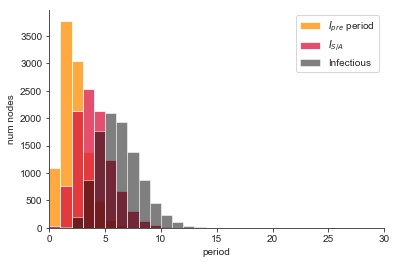

In [8]:
symptomaticPeriod_mean, symptomaticPeriod_coeffvar = 4.0, 0.4
symptomaticPeriod_scale     = symptomaticPeriod_mean*symptomaticPeriod_coeffvar**2    # gamma distn theta
symptomaticPeriod_shape     = symptomaticPeriod_mean/symptomaticPeriod_scale          # gamma distn k
symptomaticPeriods          = numpy.random.gamma(scale=symptomaticPeriod_scale, shape=symptomaticPeriod_shape, size=N)
GAMMA = 1 / symptomaticPeriods
print("Symptomatic period: mean       = " + str(numpy.mean(numpy.sort(symptomaticPeriods))) )
print("Symptomatic period: median     = "+str(numpy.percentile(numpy.sort(symptomaticPeriods), q=50)) )
print("Symptomatic period: 5  pctile  = "+str(numpy.percentile(numpy.sort(symptomaticPeriods), q=5)) )
print("Symptomatic period: 25 pctile  = "+str(numpy.percentile(numpy.sort(symptomaticPeriods), q=25)) )
print("Symptomatic period: 75 pctile  = "+str(numpy.percentile(numpy.sort(symptomaticPeriods), q=75)) )
print("Symptomatic period: 95 pctile  = "+str(numpy.percentile(numpy.sort(symptomaticPeriods), q=95)) )
print("Symptomatic period: 99.9pctile = "+str(numpy.percentile(numpy.sort(symptomaticPeriods), q=99)) )
print("Symptomatic period: % in 7-10  = "+str(len(symptomaticPeriods[ numpy.where( (symptomaticPeriods >= 7)&(symptomaticPeriods <= 10) ) ])/len(symptomaticPeriods)) )
print("GAMMA mean   = " +str(numpy.mean(GAMMA)) )
print("GAMMA median = " +str(numpy.median(GAMMA)) )

infectiousPeriods = prodromalPeriods + symptomaticPeriods
print("Infectious period: mean       = " + str(numpy.mean(numpy.sort(infectiousPeriods))) )
print("Infectious period: median     = "+str(numpy.percentile(numpy.sort(infectiousPeriods), q=50)) )
print("Infectious period: 5  pctile  = "+str(numpy.percentile(numpy.sort(infectiousPeriods), q=5)) )
print("Infectious period: 25 pctile  = "+str(numpy.percentile(numpy.sort(infectiousPeriods), q=25)) )
print("Infectious period: 75 pctile  = "+str(numpy.percentile(numpy.sort(infectiousPeriods), q=75)) )
print("Infectious period: 95 pctile  = "+str(numpy.percentile(numpy.sort(infectiousPeriods), q=95)) )

pyplot.hist(prodromalPeriods, bins=range(int(max(prodromalPeriods))), alpha=0.75, color='darkorange', label='$I_{pre}$ period')
pyplot.hist(symptomaticPeriods, bins=range(int(max(symptomaticPeriods))), alpha=0.75, color='crimson', label='$I_{S/A}$')
pyplot.hist(infectiousPeriods, bins=range(int(max(infectiousPeriods))), alpha=0.5, color='black', label='Infectious')
pyplot.xlim(0,30)
pyplot.xlabel('period')
pyplot.ylabel('num nodes')
pyplot.legend(loc='upper right')
seaborn.despine()
pyplot.show()
# pyplot.savefig(figdir+"/infectiousPeriods"+runStr+".png")
pyplot.close()

Onset-to-Hospitalization period: mean       = 10.96090688791824
Onset-to-Hospitalization period: median     = 10.259984658976787
Onset-to-Hospitalization period: 5  pctile  = 4.274234325788482
Onset-to-Hospitalization period: 25 pctile  = 7.3480400713861425
Onset-to-Hospitalization period: 75 pctile  = 13.79127939512251
Onset-to-Hospitalization period: 95 pctile  = 20.04344316392304
ETA mean   = 0.11454744067276525
ETA median = 0.09746603270983972
Hospitalization-to-Discharge period: mean       = 10.951952275791417
Hospitalization-to-Discharge period: median     = 10.182767985067159
Hospitalization-to-Discharge period: 5  pctile  = 4.316340850078177
Hospitalization-to-Discharge period: 25 pctile  = 7.366537319701053
Hospitalization-to-Discharge period: 75 pctile  = 13.731700882041098
Hospitalization-to-Discharge period: 95 pctile  = 20.141946904665403
GAMMA_H mean   = 0.11406970108913697
GAMMA_H median = 0.09820512483778167
Onset-to-Discharge period: mean       = 21.91285916370966
Onse

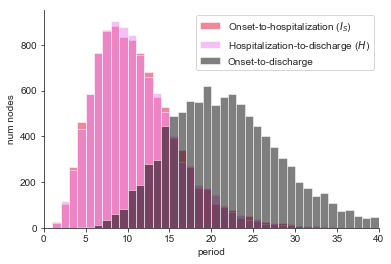

In [9]:
onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar = 11.0, 0.45
onsetToHospitalizationPeriod_scale  = onsetToHospitalizationPeriod_mean*onsetToHospitalizationPeriod_coeffvar**2    # gamma distn theta
onsetToHospitalizationPeriod_shape  = onsetToHospitalizationPeriod_mean/onsetToHospitalizationPeriod_scale          # gamma distn k
onsetToHospitalizationPeriods           = numpy.random.gamma(scale=onsetToHospitalizationPeriod_scale, shape=onsetToHospitalizationPeriod_shape, size=N)
ETA = 1 / onsetToHospitalizationPeriods
print("Onset-to-Hospitalization period: mean       = " + str(numpy.mean(numpy.sort(onsetToHospitalizationPeriods))) )
print("Onset-to-Hospitalization period: median     = "+str(numpy.percentile(numpy.sort(onsetToHospitalizationPeriods), q=50)) )
print("Onset-to-Hospitalization period: 5  pctile  = "+str(numpy.percentile(numpy.sort(onsetToHospitalizationPeriods), q=5)) )
print("Onset-to-Hospitalization period: 25 pctile  = "+str(numpy.percentile(numpy.sort(onsetToHospitalizationPeriods), q=25)) )
print("Onset-to-Hospitalization period: 75 pctile  = "+str(numpy.percentile(numpy.sort(onsetToHospitalizationPeriods), q=75)) )
print("Onset-to-Hospitalization period: 95 pctile  = "+str(numpy.percentile(numpy.sort(onsetToHospitalizationPeriods), q=95)) )
print("ETA mean   = " +str(numpy.mean(ETA)) )
print("ETA median = " +str(numpy.median(ETA)) )

hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar = 11.0, 0.45
hospitalizationToDischargePeriod_scale  = hospitalizationToDischargePeriod_mean*hospitalizationToDischargePeriod_coeffvar**2    # gamma distn theta
hospitalizationToDischargePeriod_shape  = hospitalizationToDischargePeriod_mean/hospitalizationToDischargePeriod_scale          # gamma distn k
hospitalizationToDischargePeriods       = numpy.random.gamma(scale=hospitalizationToDischargePeriod_scale, shape=hospitalizationToDischargePeriod_shape, size=N)
GAMMA_H = 1 / hospitalizationToDischargePeriods
print("Hospitalization-to-Discharge period: mean       = " + str(numpy.mean(numpy.sort(hospitalizationToDischargePeriods))) )
print("Hospitalization-to-Discharge period: median     = "+str(numpy.percentile(numpy.sort(hospitalizationToDischargePeriods), q=50)) )
print("Hospitalization-to-Discharge period: 5  pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDischargePeriods), q=5)) )
print("Hospitalization-to-Discharge period: 25 pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDischargePeriods), q=25)) )
print("Hospitalization-to-Discharge period: 75 pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDischargePeriods), q=75)) )
print("Hospitalization-to-Discharge period: 95 pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDischargePeriods), q=95)) )
print("GAMMA_H mean   = " +str(numpy.mean(GAMMA_H)) )
print("GAMMA_H median = " +str(numpy.median(GAMMA_H)) )

onsetToDischargePeriods = onsetToHospitalizationPeriods + hospitalizationToDischargePeriods
print("Onset-to-Discharge period: mean       = " + str(numpy.mean(numpy.sort(onsetToDischargePeriods))) )
print("Onset-to-Discharge period: median     = "+str(numpy.percentile(numpy.sort(onsetToDischargePeriods), q=50)) )
print("Onset-to-Discharge period: 5  pctile  = "+str(numpy.percentile(numpy.sort(onsetToDischargePeriods), q=5)) )
print("Onset-to-Discharge period: 25 pctile  = "+str(numpy.percentile(numpy.sort(onsetToDischargePeriods), q=25)) )
print("Onset-to-Discharge period: 75 pctile  = "+str(numpy.percentile(numpy.sort(onsetToDischargePeriods), q=75)) )
print("Onset-to-Discharge period: 95 pctile  = "+str(numpy.percentile(numpy.sort(onsetToDischargePeriods), q=95)) )

pyplot.hist(onsetToHospitalizationPeriods, bins=range(int(max(onsetToHospitalizationPeriods))), alpha=0.5, color='crimson', label='Onset-to-hospitalization ($I_S$)')
pyplot.hist(hospitalizationToDischargePeriods, bins=range(int(max(hospitalizationToDischargePeriods))), alpha=0.5, color='violet', label='Hospitalization-to-discharge ($H$)')
pyplot.hist(onsetToDischargePeriods, bins=range(int(max(onsetToDischargePeriods))), alpha=0.5, color='black', label='Onset-to-discharge')
pyplot.xlim(0,40)
pyplot.xlabel('period')
pyplot.ylabel('num nodes')
pyplot.legend(loc='upper right')
seaborn.despine()
pyplot.show()
# pyplot.savefig(figdir+"/onsetToDischargePeriods"+runStr+".png")
pyplot.close()

Hospitalization-to-Death period: mean       = 6.9895075191517915
Hospitalization-to-Death period: median     = 6.537659851441535
Hospitalization-to-Death period: 5  pctile  = 2.681812970614148
Hospitalization-to-Death period: 25 pctile  = 4.677896707745344
Hospitalization-to-Death period: 75 pctile  = 8.807910462222925
Hospitalization-to-Death period: 95 pctile  = 12.812835970735174
0.2813
MU_H mean   = 0.18013824909767745
MU_H median = 0.15295993120983672
Onset-to-Death period: mean       = 17.95041440707003
Onset-to-Death period: median     = 17.277303049892954
Onset-to-Death period: 5  pctile  = 9.520985628033145
Onset-to-Death period: 25 pctile  = 13.748538359062463
Onset-to-Death period: 75 pctile  = 21.43681773727416
Onset-to-Death period: 95 pctile  = 28.68417207321305


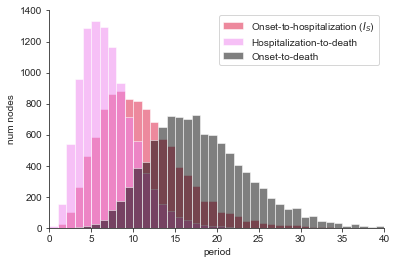

In [10]:
hospitalizationToDeathPeriod_mean, hospitalizationToDeathPeriod_coeffvar = 7.0, 0.45
hospitalizationToDeathPeriod_scale  = hospitalizationToDeathPeriod_mean*hospitalizationToDeathPeriod_coeffvar**2    # gamma distn theta
hospitalizationToDeathPeriod_shape  = hospitalizationToDeathPeriod_mean/hospitalizationToDeathPeriod_scale          # gamma distn k
hospitalizationToDeathPeriods       = numpy.random.gamma(scale=hospitalizationToDeathPeriod_scale, shape=hospitalizationToDeathPeriod_shape, size=N)
MU_H = 1 / hospitalizationToDeathPeriods
print("Hospitalization-to-Death period: mean       = " + str(numpy.mean(numpy.sort(hospitalizationToDeathPeriods))) )
print("Hospitalization-to-Death period: median     = "+str(numpy.percentile(numpy.sort(hospitalizationToDeathPeriods), q=50)) )
print("Hospitalization-to-Death period: 5  pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDeathPeriods), q=5)) )
print("Hospitalization-to-Death period: 25 pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDeathPeriods), q=25)) )
print("Hospitalization-to-Death period: 75 pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDeathPeriods), q=75)) )
print("Hospitalization-to-Death period: 95 pctile  = "+str(numpy.percentile(numpy.sort(hospitalizationToDeathPeriods), q=95)) )
print(len(hospitalizationToDeathPeriods[ numpy.where( (hospitalizationToDeathPeriods >= 7)&(hospitalizationToDeathPeriods <= 10) ) ])/len(hospitalizationToDeathPeriods) )
print("MU_H mean   = " +str(numpy.mean(MU_H)) )
print("MU_H median = " +str(numpy.median(MU_H)) )

onsetToDeathPeriods = onsetToHospitalizationPeriods + hospitalizationToDeathPeriods
print("Onset-to-Death period: mean       = " + str(numpy.mean(numpy.sort(onsetToDeathPeriods))) )
print("Onset-to-Death period: median     = "+str(numpy.percentile(numpy.sort(onsetToDeathPeriods), q=50)) )
print("Onset-to-Death period: 5  pctile  = "+str(numpy.percentile(numpy.sort(onsetToDeathPeriods), q=5)) )
print("Onset-to-Death period: 25 pctile  = "+str(numpy.percentile(numpy.sort(onsetToDeathPeriods), q=25)) )
print("Onset-to-Death period: 75 pctile  = "+str(numpy.percentile(numpy.sort(onsetToDeathPeriods), q=75)) )
print("Onset-to-Death period: 95 pctile  = "+str(numpy.percentile(numpy.sort(onsetToDeathPeriods), q=95)) )

pyplot.hist(onsetToHospitalizationPeriods, bins=range(int(max(onsetToHospitalizationPeriods))), alpha=0.5, color='crimson', label='Onset-to-hospitalization ($I_S$)')
pyplot.hist(hospitalizationToDeathPeriods, bins=range(int(max(hospitalizationToDeathPeriods))), alpha=0.5, color='violet', label='Hospitalization-to-death')
pyplot.hist(onsetToDeathPeriods, bins=range(int(max(onsetToDeathPeriods))), alpha=0.5, color='black', label='Onset-to-death')
pyplot.xlim(0,40)
pyplot.xlabel('period')
pyplot.ylabel('num nodes')
pyplot.legend(loc='upper right')
seaborn.despine()
pyplot.show()
# pyplot.savefig(figdir+"/onsetToDeathPeriods"+runStr+".png")
pyplot.close()

R0: mean       = 2.542414176430501
R0: median     = 0.4300378528693297
R0: 5  pctile  = 3.775222877977168e-05
R0: 25 pctile  = 0.023408166230461228
R0: 50 pctile  = 0.4300378528693297
R0: 75 pctile  = 2.760837350096196
R0: 95 pctile  = 12.19374818700172
R0: < mean: 73.42%
R0: > 1:    39.74%
R0: > 2:    29.58%
R0: > 3:    23.74%
R0: > 4:    19.0%
R0: 80 pctile:   3.7559192388179974
R0: Top 20 does: 0.7913435713743698


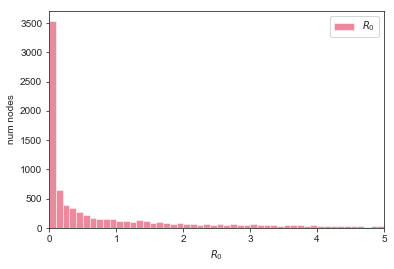

In [11]:
R0_mean, R0_coeffvar = 2.5, 2.0
R0_scale      = R0_mean*R0_coeffvar**2    # gamma distn theta
R0_shape      = R0_mean/R0_scale          # gamma distn k
R0 = numpy.random.gamma(scale=R0_scale, shape=R0_shape, size=N)

print("R0: mean       = " + str(numpy.mean(numpy.sort(R0))) )
print("R0: median     = " + str(numpy.median(numpy.sort(R0))) )
print("R0: 5  pctile  = "+str(numpy.percentile(numpy.sort(R0), q=5)) )
print("R0: 25 pctile  = "+str(numpy.percentile(numpy.sort(R0), q=25)) )
print("R0: 50 pctile  = "+str(numpy.percentile(numpy.sort(R0), q=50)) )
print("R0: 75 pctile  = "+str(numpy.percentile(numpy.sort(R0), q=75)) )
print("R0: 95 pctile  = "+str(numpy.percentile(numpy.sort(R0), q=95)) )
print "R0: < mean: "+str(numpy.count_nonzero(R0[R0 < R0_mean])/N*100)+"%"
print "R0: > 1:    "+str(numpy.count_nonzero(R0[R0 > 1])/N*100)+"%"
print "R0: > 2:    "+str(numpy.count_nonzero(R0[R0 > 2])/N*100)+"%"
print "R0: > 3:    "+str(numpy.count_nonzero(R0[R0 > 3])/N*100)+"%"
print "R0: > 4:    "+str(numpy.count_nonzero(R0[R0 > 4])/N*100)+"%"
print "R0: 80 pctile:   "+str(numpy.percentile(numpy.sort(R0), q=80))
print "R0: Top 20 does: "+str( numpy.sum(R0[R0 > numpy.percentile(numpy.sort(R0), q=80)])/numpy.sum(R0) )

pyplot.hist(R0, bins=numpy.arange(0, int(max(R0+1)), step=0.1), alpha=0.5, color='crimson', label='$R_0$')
pyplot.xlim(0,5)
pyplot.xlabel('$R_0$')
pyplot.ylabel('num nodes')
pyplot.legend(loc='upper right')
pyplot.show()
# pyplot.savefig(figdir+"/R0distn"+runStr+".png")
pyplot.close()

In [12]:
BETA     = 1/infectiousPeriods * R0
print("mean beta = "+str(numpy.mean(BETA)) )
print("beta: mean       = " + str(numpy.mean(numpy.sort(BETA))) )
print("beta: 5  pctile  = "+str(numpy.percentile(numpy.sort(BETA), q=5)) )
print("beta: 25 pctile  = "+str(numpy.percentile(numpy.sort(BETA), q=25)) )
print("beta: 50 pctile  = "+str(numpy.percentile(numpy.sort(BETA), q=50)) )
print("beta: 75 pctile  = "+str(numpy.percentile(numpy.sort(BETA), q=75)) )
print("beta: 95 pctile  = "+str(numpy.percentile(numpy.sort(BETA), q=95)) )

BETA_Q = BETA * (0.3/R0_mean) 
print("mean beta_D = "+str(numpy.mean(BETA_Q)) )
print("beta_Q: mean       = " + str(numpy.mean(numpy.sort(BETA_Q))) )
print("beta_Q: 5  pctile  = "+str(numpy.percentile(numpy.sort(BETA_Q), q=5)) )
print("beta_Q: 25 pctile  = "+str(numpy.percentile(numpy.sort(BETA_Q), q=25)) )
print("beta_Q: 50 pctile  = "+str(numpy.percentile(numpy.sort(BETA_Q), q=50)) )
print("beta_Q: 75 pctile  = "+str(numpy.percentile(numpy.sort(BETA_Q), q=75)) )
print("beta_Q: 95 pctile  = "+str(numpy.percentile(numpy.sort(BETA_Q), q=95)) )

mean beta = 0.4542375146172097
beta: mean       = 0.45423751461720974
beta: 5  pctile  = 6.617596841542901e-06
beta: 25 pctile  = 0.003915094566271661
beta: 50 pctile  = 0.07120135519591832
beta: 75 pctile  = 0.46320976335877895
beta: 95 pctile  = 2.1387148683998234
mean beta_D = 0.05450850175406517
beta_Q: mean       = 0.05450850175406517
beta_Q: 5  pctile  = 7.941116209851481e-07
beta_Q: 25 pctile  = 0.00046981134795259923
beta_Q: 50 pctile  = 0.008544162623510198
beta_Q: 75 pctile  = 0.05558517160305347
beta_Q: 95 pctile  = 0.25664578420797873


In [13]:
# Source: Verity et al.
ageGroup_pctHospitalized = {'0-9':      0.0000,
                            '10-19':    0.0004,
                            '20-29':    0.0104,
                            '30-39':    0.0343,
                            '40-49':    0.0425,
                            '50-59':    0.0816,
                            '60-69':    0.118,
                            '70-79':    0.166,
                            '80+':      0.184 }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in individual_ageGroups]

In [14]:
# Source: Verity et al.
ageGroup_hospitalFatalityRate = {'0-9':     0.0000,
                                 '10-19':   0.3627,
                                 '20-29':   0.0577,
                                 '30-39':   0.0426,
                                 '40-49':   0.0694,
                                 '50-59':   0.1532,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.7283 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in individual_ageGroups]

In [15]:
TESTING_RANDOM_COMPLIANCE   = (numpy.random.rand(N) < TESTING_RANDOM_COMPLIANCE_RATE)
TESTING_TRACED_COMPLIANCE   = (numpy.random.rand(N) < TESTING_TRACED_COMPLIANCE_RATE)
TESTING_SELFSEEK_COMPLIANCE = (numpy.random.rand(N) < TESTING_SELFSEEK_COMPLIANCE_RATE)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TRACING_COMPLIANCE = (numpy.random.rand(N) < TRACING_COMPLIANCE_RATE)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

SYMPTOMATIC_SEEKTEST_COMPLIANCE = (numpy.random.rand(N) < SYMPTOMATIC_SEEKTEST_COMPLIANCE_RATE)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

SYMPTOMATIC_SELFISOLATE_COMPLIANCE = (numpy.random.rand(N) < SYMPTOMATIC_SELFISOLATE_COMPLIANCE_RATE)
TRACING_SELFISOLATE_COMPLIANCE     = (numpy.random.rand(N) < TRACING_SELFISOLATE_COMPLIANCE_RATE)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

HOUSEHOLD_ISOLATION_COMPLIANCE     = (numpy.random.rand(N) < HOUSEHOLD_ISOLATION_COMPLIANCE_RATE)

--------

# SCENARIO

In [16]:
# model_det = SEIRSModel(beta=numpy.median(1/(prodromalPeriods+symptomaticPeriods))*R0_mean, 
#                        sigma=numpy.median(SIGMA), 
#                        gamma=numpy.median(1/(prodromalPeriods+symptomaticPeriods)),
#                        initN=N, initE=INIT_EXPOSED)

# model_det.run(T=T, dt=0.001)

In [17]:
model = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                                        beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                                        gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                                        a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                                        beta_pairwise_mode=BETA_PAIRWISE_MODE, alpha_pairwise_mode=ALPHA_PAIRWISE_MODE,
                                        G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                                        initE=INIT_EXPOSED, transition_mode=TRANSITION_MODE)

extended_models.py:483: RuntimeWarning: divide by zero encountered in log
  self.alpha               = numpy.log(self.degree)/numpy.log(numpy.mean(self.degree))     if self.parameters['alpha'] is None   else numpy.array(self.parameters['alpha'])   if isinstance(self.parameters['alpha'], (list, numpy.ndarray))   else numpy.full(fill_value=self.parameters['alpha'], shape=(self.numNodes,1))
extended_models.py:484: RuntimeWarning: divide by zero encountered in log
  self.alpha_Q             = numpy.log(self.degree_Q)/numpy.log(numpy.mean(self.degree_Q)) if self.parameters['alpha_Q'] is None else numpy.array(self.parameters['alpha_Q']) if isinstance(self.parameters['alpha_Q'], (list, numpy.ndarray)) else numpy.full(fill_value=self.parameters['alpha_Q'], shape=(self.numNodes,1))


In [18]:
interventionInterval = run_manual_random_testing_sim(
                              model=model, T=T, intervention_start_pct_infected=INTERVENTION_START_PCT_INFECTED,
                              testing_interval=TESTING_INTERVAL, tests_per_interval=TESTS_PER_INTERVAL, test_falseneg_rate=TEST_FALSENEG_RATE,
                              do_random_testing=DO_RANDOM_TESTING, testing_random_compliance=TESTING_RANDOM_COMPLIANCE, testing_degree_bias=TESTING_DEGREE_BIAS,
                              do_tracing_testing=DO_TRACING_TESTING, tracing_compliance=TRACING_COMPLIANCE, testing_traced_compliance=TESTING_TRACED_COMPLIANCE, max_pct_tests_for_tracing=MAX_PCT_TESTS_FOR_TRACING, num_contacts_to_trace=NUM_CONTACTS_TO_TRACE, frac_contacts_to_trace=FRAC_CONTACTS_TO_TRACE, tracing_interval_lag=TRACING_INTERVAL_LAG,
                              do_seeking_testing=DO_SEEKING_TESTING, symptomatic_seektest_compliance=SYMPTOMATIC_SEEKTEST_COMPLIANCE, testing_selfseek_compliance=TESTING_SELFSEEK_COMPLIANCE, max_pct_tests_for_seeking=MAX_PCT_TESTS_FOR_SEEKING,
                              do_symptom_selfiso=DO_SYMPTOM_SELFISO, symptomatic_selfiso_compliance=SYMPTOMATIC_SELFISOLATE_COMPLIANCE, 
                              do_tracing_selfiso=DO_TRACING_SELFISO, tracing_selfiso_compliance=TRACING_SELFISOLATE_COMPLIANCE,
                              isolate_positive_households=DO_ISOLATE_POSITIVE_HOUSEHOLDS, isolate_symptomatic_households=DO_ISOLATE_SYMPTOMATIC_HOUSEHOLDS, 
                              isolate_tracing_selfiso_households=DO_ISOLATE_TRACING_SELFISO_HOUSEHOLDS,
                              household_isolation_compliance=HOUSEHOLD_ISOLATION_COMPLIANCE, households=households)

[no intervention @ t = 0.01 (0.10% infected)]
[no intervention @ t = 1.44 (0.10% infected)]
[no intervention @ t = 2.78 (0.10% infected)]
[no intervention @ t = 3.46 (0.09% infected)]
[no intervention @ t = 4.02 (0.10% infected)]
[no intervention @ t = 5.52 (0.12% infected)]
[no intervention @ t = 6.05 (0.11% infected)]
[no intervention @ t = 7.01 (0.13% infected)]
[no intervention @ t = 8.12 (0.15% infected)]
[no intervention @ t = 9.12 (0.19% infected)]
[no intervention @ t = 10.11 (0.23% infected)]
[no intervention @ t = 11.09 (0.24% infected)]
[no intervention @ t = 12.00 (0.27% infected)]
[no intervention @ t = 13.09 (0.38% infected)]
[no intervention @ t = 14.09 (0.47% infected)]
[no intervention @ t = 15.01 (0.59% infected)]
[no intervention @ t = 16.03 (0.65% infected)]
[no intervention @ t = 17.04 (0.73% infected)]
[no intervention @ t = 18.01 (0.86% infected)]
[TESTING @ t = 19.02 (1.08% infected)]
	106 current undetected infections
	16 self-isolated due to symptoms (0 as hou

[TESTING @ t = 38.00 (8.60% infected)]
	764 current undetected infections
	52 self-isolated due to symptoms (0 as housemates of symptomatic)
	19 isolated due to positive test (0 as housemates of positive)
	23	tested self-seek	[+ 16 positive (69.57 %) +]
	55	tested as traces	[+ 3 positive (5.45 %) +]
	0	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 19 positive (24.36 %) +]
[TESTING @ t = 39.00 (9.09% infected)]
	816 current undetected infections
	57 self-isolated due to symptoms (0 as housemates of symptomatic)
	20 isolated due to positive test (0 as housemates of positive)
	18	tested self-seek	[+ 13 positive (72.22 %) +]
	60	tested as traces	[+ 7 positive (11.67 %) +]
	0	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 20 positive (25.64 %) +]
[TESTING @ t = 40.00 (9.36% infected)]
	841 current undetected infections
	49 self-isolated due to symptoms (0 as housemates of symptomatic)
	27 isolated due to positive test (0 as housemates of positive)
	30	tested

[TESTING @ t = 59.00 (10.31% infected)]
	837 current undetected infections
	51 self-isolated due to symptoms (0 as housemates of symptomatic)
	33 isolated due to positive test (0 as housemates of positive)
	37	tested self-seek	[+ 28 positive (75.68 %) +]
	41	tested as traces	[+ 5 positive (12.20 %) +]
	0	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 33 positive (42.31 %) +]
[TESTING @ t = 60.00 (9.93% infected)]
	789 current undetected infections
	45 self-isolated due to symptoms (0 as housemates of symptomatic)
	40 isolated due to positive test (0 as housemates of positive)
	46	tested self-seek	[+ 37 positive (80.43 %) +]
	32	tested as traces	[+ 3 positive (9.38 %) +]
	0	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 40 positive (51.28 %) +]
[TESTING @ t = 61.00 (9.39% infected)]
	735 current undetected infections
	44 self-isolated due to symptoms (0 as housemates of symptomatic)
	33 isolated due to positive test (0 as housemates of positive)
	41	teste

[TESTING @ t = 80.01 (2.72% infected)]
	164 current undetected infections
	15 self-isolated due to symptoms (0 as housemates of symptomatic)
	8 isolated due to positive test (0 as housemates of positive)
	9	tested self-seek	[+ 8 positive (88.89 %) +]
	31	tested as traces	[+ 0 positive (0.00 %) +]
	38	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 8 positive (10.26 %) +]
[TESTING @ t = 81.06 (2.60% infected)]
	161 current undetected infections
	12 self-isolated due to symptoms (0 as housemates of symptomatic)
	11 isolated due to positive test (0 as housemates of positive)
	10	tested self-seek	[+ 8 positive (80.00 %) +]
	27	tested as traces	[+ 1 positive (3.70 %) +]
	41	tested randomly		[+ 2 positive (4.88 %) +]
	78	tested TOTAL	[+ 11 positive (14.10 %) +]
[TESTING @ t = 82.02 (2.48% infected)]
	152 current undetected infections
	18 self-isolated due to symptoms (0 as housemates of symptomatic)
	18 isolated due to positive test (0 as housemates of positive)
	19	tested sel

[TESTING @ t = 102.06 (0.88% infected)]
	53 current undetected infections
	3 self-isolated due to symptoms (0 as housemates of symptomatic)
	2 isolated due to positive test (0 as housemates of positive)
	2	tested self-seek	[+ 2 positive (100.00 %) +]
	3	tested as traces	[+ 0 positive (0.00 %) +]
	73	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 2 positive (2.56 %) +]
[TESTING @ t = 103.01 (0.86% infected)]
	54 current undetected infections
	8 self-isolated due to symptoms (0 as housemates of symptomatic)
	5 isolated due to positive test (0 as housemates of positive)
	7	tested self-seek	[+ 5 positive (71.43 %) +]
	20	tested as traces	[+ 0 positive (0.00 %) +]
	51	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 5 positive (6.41 %) +]
[TESTING @ t = 104.04 (0.83% infected)]
	49 current undetected infections
	3 self-isolated due to symptoms (0 as housemates of symptomatic)
	4 isolated due to positive test (0 as housemates of positive)
	3	tested self-seek	[+ 

[TESTING @ t = 124.02 (0.20% infected)]
	10 current undetected infections
	2 self-isolated due to symptoms (0 as housemates of symptomatic)
	2 isolated due to positive test (0 as housemates of positive)
	2	tested self-seek	[+ 2 positive (100.00 %) +]
	1	tested as traces	[+ 0 positive (0.00 %) +]
	75	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 2 positive (2.56 %) +]
[TESTING @ t = 125.20 (0.20% infected)]
	9 current undetected infections
	3 self-isolated due to symptoms (0 as housemates of symptomatic)
	3 isolated due to positive test (0 as housemates of positive)
	3	tested self-seek	[+ 3 positive (100.00 %) +]
	0	tested as traces	[+ 0 positive (0.00 %) +]
	75	tested randomly		[+ 0 positive (0.00 %) +]
	78	tested TOTAL	[+ 3 positive (3.85 %) +]
[TESTING @ t = 126.44 (0.18% infected)]
	6 current undetected infections
	0 self-isolated due to symptoms (0 as housemates of symptomatic)
	0 isolated due to positive test (0 as housemates of positive)
	0	tested self-seek	[+ 0 

In [19]:
print("total percent infected: %0.2f%%" % ((model.total_num_infected()[-1]+model.total_num_recovered()[-1])/N * 100) )
print("total percent fatality: %0.2f%%" % (model.numF[-1]/N * 100) )
print("peak  pct hospitalized: %0.2f%%" % (numpy.max(model.numH)/N * 100) )

total percent infected: 50.15%
total percent fatality: 0.61%
peak  pct hospitalized: 0.48%


--------

In [20]:
est_Reff_finalS = (numpy.log(model.numS[-1]/N)/(model.numS[-1]/N - 1))
r0_finalS       = (est_Reff_finalS - 1)/numpy.mean(infectiousPeriods)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

peak_tidx       = numpy.argmax(model.total_num_infected())
peakTime        = model.tseries[peak_tidx]
# peakInfected    = 1 - model.total_num_susceptible()[numpy.argmax(model.total_num_infected())]/N
peakRecovered   = model.total_num_recovered()[numpy.argmax(model.total_num_infected())]/N
est_Reff_peakR  = 1/(1 - peakRecovered)
r0_peakR        = (est_Reff_peakR - 1)/numpy.mean(infectiousPeriods)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


New best rvalue:    0.9864096144503961
New best slope:     0.06407756849273336
New best intercept: 4.2462230745777765
New best tidx:      9142
New best tspan:     (26.022638351977943, 47.02356939171867)


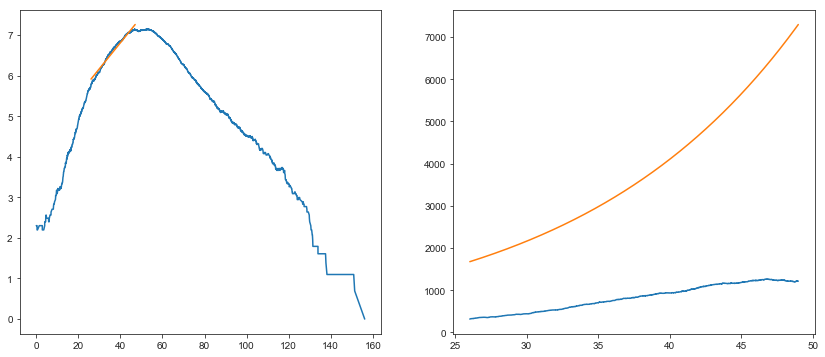

In [21]:
best_rvalue     = -1
best_slope      = 0
best_intercept  = 0
best_tidx       = 0
best_tspan      = (0,0)
start_t         = interventionInterval[0]+7 if interventionInterval[0] is not None else 0+7
minreg_t        = min(start_t+21, model.tseries[-1])
start_tidx      = numpy.searchsorted(model.tseries, start_t)

logIseries = numpy.log(model.total_num_infected())

for tidx, t in enumerate(model.tseries):
    if(t < minreg_t):
        continue
    (slope, intercept, rvalue, pvalue, stderr) = linregress(model.tseries[start_tidx:tidx], logIseries[start_tidx:tidx])
    if(rvalue >= best_rvalue):
        best_rvalue    = rvalue
        best_slope     = slope
        best_intercept = intercept
        best_tidx      = tidx
        best_tspan     = (start_t, t)
print "New best rvalue:    "+str(best_rvalue)
print "New best slope:     "+str(best_slope)
print "New best intercept: "+str(best_intercept)
print "New best tidx:      "+str(best_tidx)
print "New best tspan:     "+str(best_tspan)

r0_expfit        = best_slope
L                = numpy.mean(infectiousPeriods)
est_Reff_expfit  = 1 + L*r0_expfit

fig_Reff, axes_Reff = pyplot.subplots(1, 2, figsize=(12,5), # sharex='all', sharey='all',
                                      gridspec_kw={'left':0.06, 'right':0.98, 'top':0.96, 'bottom':0.06})
axes_Reff[0].plot(model.tseries, logIseries)
axes_Reff[0].plot(model.tseries[start_tidx:best_tidx], (model.tseries[start_tidx:best_tidx]*best_slope + best_intercept))
axes_Reff[1].plot(model.tseries[start_tidx:int(len(model.tseries)/2)], model.total_num_infected()[start_tidx:int(len(model.tseries)/2)])
axes_Reff[1].plot(model.tseries[start_tidx:int(len(model.tseries)/2)], model.total_num_infected()[start_tidx]*numpy.exp(r0_expfit*model.tseries[start_tidx:int(len(model.tseries)/2)]))
# fig_Reff.savefig(figdir+"/exponentialfit"+runStr+".png")

In [22]:
if(est_Reff_expfit >= 1.0 and (est_Reff_finalS < est_Reff_expfit or est_Reff_peakR < est_Reff_expfit)):
    est_Reff_combo = numpy.mean([est_Reff_expfit, est_Reff_finalS, est_Reff_peakR])
else:
    est_Reff_combo = est_Reff_expfit
r0_combo = (est_Reff_combo - 1)/numpy.mean(infectiousPeriods)

In [23]:
print "Estimated growth rate: "+str(r0_expfit)
print "Estimated effective R (expfit): "+str(est_Reff_expfit)
print "Estimated effective R (finalS): "+str(est_Reff_finalS)
print "Estimated effective R (peakR):  "+str(est_Reff_peakR)
print "Estimated effective R (combo):  "+str(est_Reff_combo)

Estimated growth rate: 0.06407756849273336
Estimated effective R (expfit): 1.3989083459344147
Estimated effective R (finalS): 1.3957129327656395
Estimated effective R (peakR):  1.3005592404734034
Estimated effective R (combo):  1.3650601730578193


In [24]:
model.args = args
model_data = vars(model.args)
model_data.update({'total_pct_infected':    ((model.total_num_infected()[-1]+model.total_num_recovered()[-1])/N),
                   'total_pct_fatality':    (model.numF[-1]/N),
                   'max_pct_hospitalized':  (numpy.max(model.numH)/N),
                   'estimated_growth_rate_expfit': r0_expfit,
                   'estimated_growth_rate_finalS': r0_finalS,
                   'estimated_growth_rate_peakR':  r0_peakR,
                   'estimated_growth_rate_combo':  r0_combo,
                   'estimated_Reff_expfit': est_Reff_expfit,
                   'estimated_Reff_finalS': est_Reff_finalS,
                   'estimated_Reff_peakR':  est_Reff_peakR,
                   'estimated_Reff_combo':  est_Reff_combo,
                   'final_numS':            (model.numS[-1]),
                   'final_numR':            (model.numR[-1]),
                   'final_numF':            (model.numF[-1]),
                   'final_numInfected':     (model.total_num_infected()[-1]),
                   'final_numRecovered':    (model.total_num_recovered()[-1]),
                   'final_numTested':       (model.total_num_tested()[-1]),
                   'final_numPositive':     (model.total_num_positive()[-1]),
                   'final_time':            model.tseries[-1],
                   'peak_time':             peakTime,
                   'peak_pct_infected':     (model.total_num_infected()[peak_tidx]/N),
                   'interventionInterval':  interventionInterval
                  })
print model_data
summaryData = pandas.DataFrame([model_data])
summaryData.to_csv(outdir+'/summary'+runStr+'.csv', sep='\t', index=False)

{'estimated_Reff_peakR': 1.3005592404734034, 'estimated_growth_rate_finalS': 0.06356428189877865, 'HOUSEHOLD_ISOLATION_COMPLIANCE_RATE': 0.8, 'final_time': 171.2897733745197, 'TESTING_DEGREE_BIAS': 0, 'TESTING_RANDOM_COMPLIANCE_RATE': 0.8, 'TEST_FALSENEG_RATE': 'temporal', 'SYMPTOMATIC_SEEKTEST_COMPLIANCE_RATE': 0.8, 'FRAC_CONTACTS_TO_TRACE': 1.0, 'estimated_Reff_expfit': 1.3989083459344147, 'interventionInterval': (19.022638351977943, 171.2897733745197), 'R0_mean': 2.5, 'INTERVENTION_START_PCT_INFECTED': 0.01, 'estimated_growth_rate_peakR': 0.048279524642296776, 'total_pct_fatality': 0.0061, 'SYMPTOMATIC_SELFISOLATE_COMPLIANCE_RATE': 0.8, 'TRACING_INTERVAL_LAG': 2, 'DO_ISOLATE_SYMPTOMATIC_HOUSEHOLDS': False, 'final_numS': 4924.0, 'final_numR': 5015.0, 'TRACING_SELFISOLATE_COMPLIANCE_RATE': 0.8, 'final_numTested': 5795.0, 'PCT_ASYMPTOMATIC': 0.25, 'FRAC_TO_TEST_PER_INTERVAL': 0.0078125, 'estimated_Reff_finalS': 1.3957129327656395, 'INIT_PCT_E': 0.0001, 'ALPHA_PAIRWISE_MODE': 'mean', 'T

In [25]:
timeseriesData = pandas.DataFrame({'tseries': model.tseries, 
                                   'num_infected': model.total_num_infected(),
                                   'num_recovered': model.total_num_recovered(),
                                   'num_tested': model.total_num_tested(),
                                   'num_positive': model.total_num_positive()})
timeseriesData.to_csv(outdir+'/timeseries'+runStr+'.csv', sep='\t', index=False)

In [26]:
# with gzip.GzipFile(outdir+"/model"+runStr+".pgz", 'w') as f:    
#     pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

In [27]:
# infectionsLogData = pandas.DataFrame(model.infectionsLog)
# infectionsLogData.to_csv(outdir+'/infectionsLog'+runStr+'.csv', sep='\t', index=False)

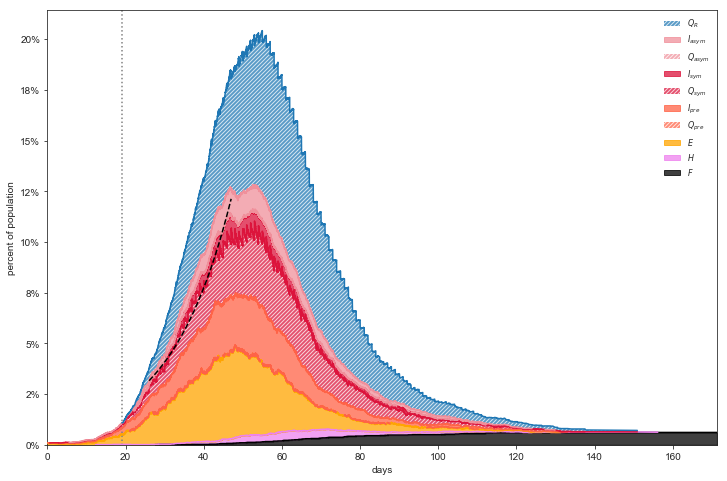

In [28]:
fig, ax = model.figure_infections(combine_Q_infected=False, show=False, use_seaborn=False,
                                    plot_Q_R='stacked', #plot_R='stacked', 
                                    plot_Q_S='stacked', #plot_S='stacked', 
                                    #dashed_reference_results=model_det,
                                    vlines=[interventionInterval[0]]
                                 )

ax.plot(model.tseries[start_tidx:best_tidx], (model.total_num_infected()/N)[start_tidx]*numpy.exp(r0_expfit*(model.tseries[start_tidx:best_tidx]-model.tseries[start_tidx])), color='black', linestyle='--', zorder=10)
# ax.plot(model.tseries[0:best_tidx], (model.total_num_infected()/N)[0]*numpy.exp(r0_finalS*(model.tseries[0:best_tidx])), color='black', linestyle='-.', zorder=10)
# ax.plot(model.tseries[0:best_tidx], (model.total_num_infected()/N)[0]*numpy.exp(r0_peakR*(model.tseries[0:best_tidx])), color='black', linestyle=':', zorder=10)
# ax.plot(model.tseries[0:best_tidx], (model.total_num_infected()/N)[0]*numpy.exp(r0_combo*(model.tseries[0:best_tidx])), color='black', linestyle='-', zorder=10)

fig.savefig(figdir+"/prevalence"+runStr+".png")